In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

from kmeans_algorithm import Kmeans

In [2]:
train = ["is this good?", "this is bad", "some other text here", "i am hero", "blue jeans", "red carpet", "red dog",
     "blue sweater", "red hat", "kitty blue"]

In [3]:
'''
1 Forma
vect = TfidfVectorizer()  
X = vect.fit_transform(train)
clf = KMeans(n_clusters=3)
data = clf.fit(X)
centroids = clf.cluster_centers_
'''
#2 Forma
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(train)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()
#print(tf_idf_vectorizor.get_feature_names())
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head()

,bad,blue,carpet,dog,good,hat,hero,jeans,kitty,red,sweater,text
0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.596775,0.0,0.0,0.0,0.0,0.0,0.802409,0.0,0.0,0.0,0.0


Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


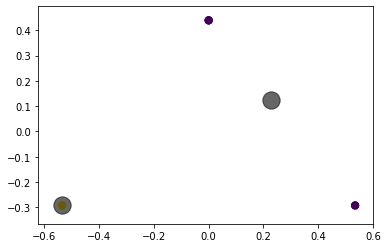

In [8]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = Kmeans(2, 1, 600)
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

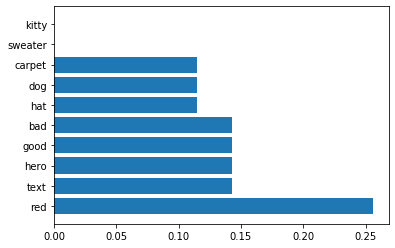

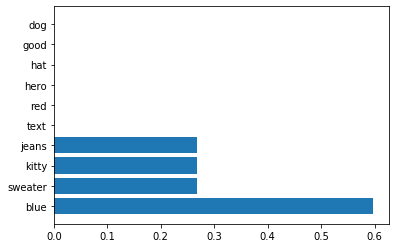

In [13]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(predicted_values)
    dfs = []
    for label in labels:
        id_temp = np.where(predicted_values==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, predicted_values,10)
for d in dfs:
    height = [h[1] for h in d.values]
    bars = [h[0] for h in d.values]
    y_pos = np.arange(len(bars))
    plt.barh(y_pos, height)
    plt.yticks(y_pos, bars)
    plt.show()